In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define object for moving point charge

In [2]:
from charge.time import tr_arr

In [3]:
from numbers import Real

class Moving_Point_Charge(object):
    
    # System spatial dimension
    dim = 3
    
    # light speed in atomic unit
    c = 1.0 / 0.0072973525693
    
    def __init__(self, q, rs, vs):
        for _arg in (rs, vs): assert callable(_arg)
        assert isinstance(q, Real)
        self.q, self.rs, self.vs = q, rs, vs
        
    
    def scalarpot_xyz(self, xyz, t):
        """
        Evaluate Liénard–Wiechert scalar potential 
        at given space-time point(s) in atomic unit
        """
        try: _rs,_vs,_xyz = (np.array(_o) for _o in (rs(t),vs(t),xyz))
#         try: _xyz = (np.array(_o) for _o in (xyz,))
        except: raise TypeError()
        
        for _obj in (_rs, _vs): assert _obj.shape == (self.dim,)
        
        _beta = _vs / self.c  # velocity relative to the light speed
        _rela_xyz = _xyz - _rs
        _dist = np.sqrt(np.square(_rela_xyz).sum(axis=-1))
        assert np.all(_dist > 0)
        _tr = tr_arr(xyz, t, rs, self.c)
#         _tr = t - _dist / self.c
        
        _denom = _dist - (_rela_xyz * _beta).sum(axis=-1)
        _pot = self.q / _denom  # in atomic unit
        return _pot
    
    
    def scalarpot(self, x, y, z, t):
        try: _xyz = np.moveaxis(np.array((x,y,z)), 0, -1)
        except: raise Exception("Failed to construct coordinate array")
        return self.scalarpot_xyz(_xyz, t)

# Define a particle

In [4]:
beta = 0.5
vs = lambda t: np.array([beta*Moving_Point_Charge.c,0,0])
rs = lambda t: np.array([-1,0,0]) + t * vs(t)
q1 = Moving_Point_Charge(1.0, rs, vs)

# Evaluate the scalar potential

In [5]:
x_arr = np.linspace(-2,2,51)
y_arr = np.linspace(-1,1,41)

x_grid, y_grid = np.meshgrid(x_arr, y_arr, indexing='ij')
z_grid = np.zeros_like(x_grid)

In [6]:
scalpot_grid = q1.scalarpot(x_grid, y_grid, z_grid, t=0.0)

# Plot

In [7]:
from vis.plot import construct_catesian_mesh_for_pcolormesh
x_color_grid, y_color_grid = construct_catesian_mesh_for_pcolormesh(x_arr, y_arr)
z_color_grid = np.zeros_like(x_grid)

In [8]:
vmax = np.quantile(scalpot_grid, 0.95)
vmin = np.quantile(scalpot_grid, 0.05)
from matplotlib.colors import Normalize
norm = Normalize(vmin, vmax)

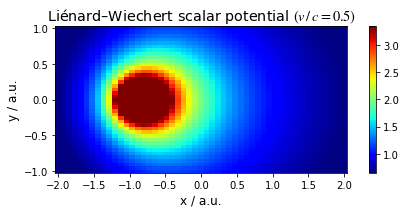

In [9]:
fig, ax = plt.subplots(figsize=(7,3))
quad = ax.pcolormesh(x_color_grid, y_color_grid, scalpot_grid, 
                     cmap='jet', norm=norm)
ax.set_aspect(1.0)
ax.set_xlabel("x / a.u."), ax.set_ylabel("y / a.u.")
ax.set_title(r"Liénard–Wiechert scalar potential $(v\,/\,c={})$".format(beta))
cb = fig.colorbar(quad, ax=ax)
fig.tight_layout()

In [10]:
fig_filename = "scalarpot-beta-{:.2f}-test-0.png".format(beta)
print(fig_filename)
# fig.savefig(fig_filename)

scalarpot-beta-0.50-test-0.png
